**Sentiment Analysis**

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
df = pd.read_csv("imdb_dataset.csv")
print(f"Dataset Preview: {df.head()}")
print()
print(df.info())

Dataset Preview:                                               review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


**Preprocess Text**

In [54]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", "", text)  # remove HTML
    text = re.sub(r"[^a-z\s]", "", text)  # keep only letters
    words = [w for w in text.split() if w not in stop_words]
    return " ".join(words)

df["clean_review"] = df["review"].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marku\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
df.head()

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode yo...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


**Convert Text into Vectors**

In [56]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["clean_review"])
y = df["sentiment"].map({"positive":1, "negative":0})

**Logistic Regression**

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



**Hyperparameter tuning**

In [58]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.pipeline import Pipeline

# # Split dataset
# X_train, X_test, y_train, y_test = train_test_split(
#     df["clean_review"], df["sentiment"].map({"positive":1, "negative":0}), 
#     test_size=0.2, random_state=42
# )

# # Pipeline: TF-IDF + Logistic Regression
# pipeline = Pipeline([
#     ("tfidf", TfidfVectorizer()),
#     ("logreg", LogisticRegression(max_iter=1000))
# ])

# # Grid search for best parameters
# param_grid = {
#     "tfidf__max_features": [5000, 10000, 20000],
#     "tfidf__ngram_range": [(1,1), (1,2)],   # try unigrams vs unigrams+bigrams
#     "logreg__C": [0.1, 1, 10]               # regularization strength
# }

# grid = GridSearchCV(pipeline, param_grid, cv=3, scoring="accuracy", verbose=2)
# grid.fit(X_train, y_train)

# print("Best parameters:", grid.best_params_)
# print("Best CV accuracy:", grid.best_score_)
# print("Test accuracy:", grid.score(X_test, y_test))

**Using Best Parameters**

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marku\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



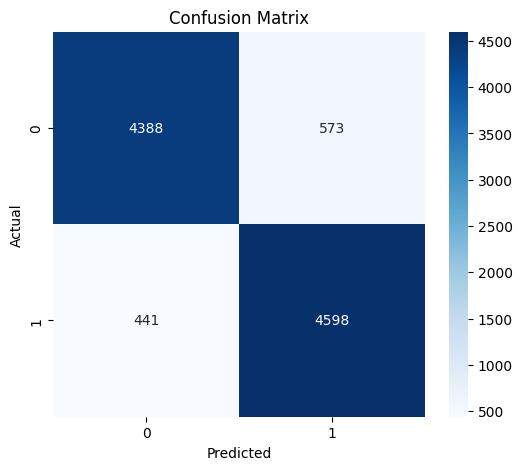

In [59]:
# Load dataset
df = pd.read_csv("imdb_dataset.csv")

# Example preprocessing function (can adjust as needed)
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    words = [w for w in text.split() if w not in stop_words]
    return " ".join(words)

df["clean_review"] = df["review"].apply(clean_text)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    df["clean_review"], df["sentiment"].map({"positive":1, "negative":0}),
    test_size=0.2, random_state=42
)

# Vectorize with TF-IDF using best parameters
vectorizer = TfidfVectorizer(max_features=20000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Logistic Regression with best C
model = LogisticRegression(C=1, max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Evaluate
y_pred = model.predict(X_test_tfidf)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Optional: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Top positive & negative words**

In [60]:
# Get feature names
feature_names = vectorizer.get_feature_names_out()
coef = model.coef_[0]

# Top 20 positive & negative features
top_pos = np.argsort(coef)[-20:]
top_neg = np.argsort(coef)[:20]

print("Top Positive Words:")
for i in reversed(top_pos):
    print(feature_names[i], ":", coef[i])

print("\nTop Negative Words:")
for i in top_neg:
    print(feature_names[i], ":", coef[i])

Top Positive Words:
great : 7.545608199913617
excellent : 6.690736736480851
perfect : 5.232331420118053
wonderful : 5.13093989809176
amazing : 4.783598312315402
best : 4.72254210899176
brilliant : 4.521365141811045
favorite : 4.3860765338084455
loved : 4.247238532804293
one best : 4.167629919550403
hilarious : 4.16025209906318
enjoyed : 3.884003298517181
superb : 3.8682683150992547
fantastic : 3.848573647430154
love : 3.8470963352125187
enjoyable : 3.7821439963733834
entertaining : 3.6837820854847236
fun : 3.6728834174694702
today : 3.635320917542517
definitely : 3.6044106527997215

Top Negative Words:
worst : -9.516883307033973
bad : -7.729504446907218
awful : -7.389751317386168
boring : -6.849642957196932
waste : -6.759399223359789
poor : -5.95017553672973
terrible : -5.934335053339535
nothing : -5.775505888492105
dull : -5.085644079288778
worse : -5.0080478649243325
poorly : -4.916717062682999
horrible : -4.726594044436351
disappointing : -4.538890888186718
supposed : -4.52600189933